In [16]:
import os
import shutil
import pywt
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("./test_image/image.png")
img.shape

(1000, 1600, 3)

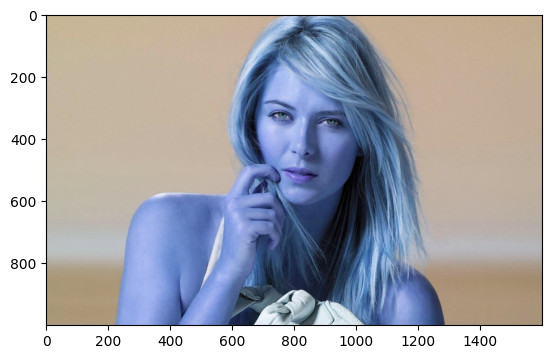

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1000, 1600)

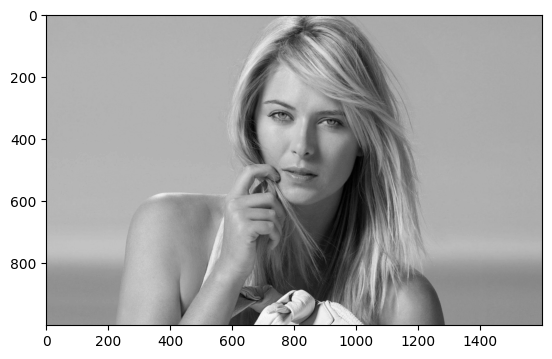

In [5]:
plt.imshow(gray,cmap="gray")

In [6]:
face_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_eye.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[628, 178, 414, 414]])

In [7]:
x,y,w,h = faces[0]
x,y,w,h

(628, 178, 414, 414)

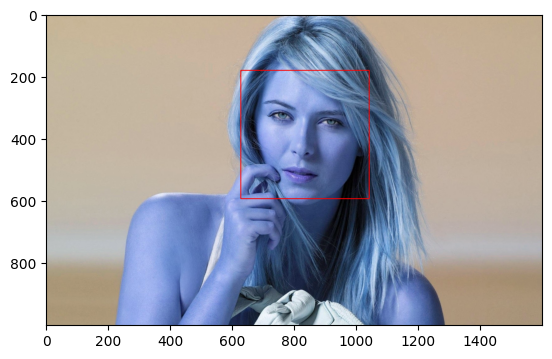

In [8]:
face_image = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_image)

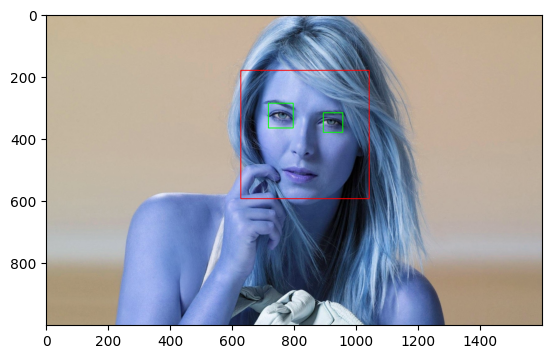

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+int(h/2),x:x+w] # here int(h/2) is done because there is mismatch heppening and third eye is detecting😂
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) 
plt.figure()
plt.imshow(face_img, cmap="gray")
plt.show()


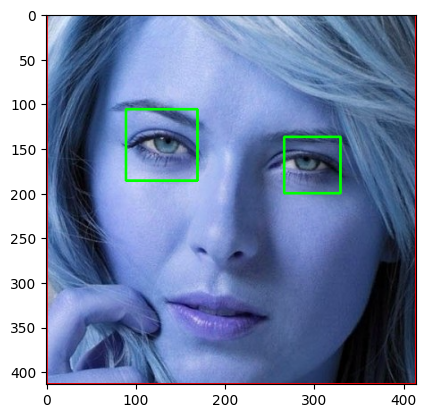

In [10]:
plt.imshow(roi_color, cmap="gray")

In [40]:
#now make a full function for all images
def get_cropped_image_if_2_eye(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3 , 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if (len(eyes)) >= 2:
            return roi_color

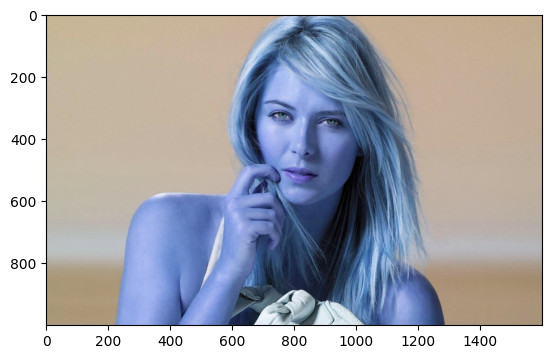

In [41]:
original_image = cv2.imread("./test_image/image.png")
cropped_image = get_cropped_image_if_2_eye("./test_image/image.png")
plt.imshow(original_image)

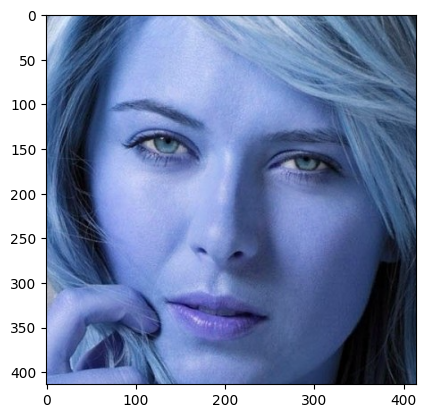

In [42]:
plt.imshow(cropped_image)

In [43]:
path_of_img = "./sports_person/"
cropped_img_path = "./sports_person/cropped/"

In [44]:
img_dirs = []
for entry in os.scandir(path_of_img):
    if entry.is_dir():
        img_dirs.append(entry)
img_dirs

[<DirEntry 'cropped'>,
 <DirEntry 'lionel_messi'>,
 <DirEntry 'maria_sharapova'>,
 <DirEntry 'roger_federer'>,
 <DirEntry 'serena_williams'>,
 <DirEntry 'virat_kohli'>]

In [50]:
if os.path.exists(cropped_img_path):
    shutil.rmtree(cropped_img_path)
os.mkdir(cropped_img_path)

In [51]:
cropped_img_dirs = []
celebrity_file_name_dictionary = {}
for img_dir in img_dirs:
    counter = 1
    sub_folder = img_dir.path.split('/')[-1]
    celebrity_file_name_dictionary[sub_folder] = []
    cropped_folder = cropped_img_path + sub_folder
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eye(entry.path)
        if not os.path.exists(cropped_folder):
            os.mkdir(cropped_folder)
            print("created directory : ", cropped_folder )
        if roi_color is not None:
            cropped_file_name = sub_folder + str(counter) + ".png"
            cropped_file_path = cropped_folder+ "/" + cropped_file_name
            celebrity_file_name_dictionary[sub_folder].append(cropped_file_path)
            cv2.imwrite(cropped_file_path,roi_color)
             
            counter +=1



created directory :  ./sports_person/cropped/lionel_messi
created directory :  ./sports_person/cropped/maria_sharapova
created directory :  ./sports_person/cropped/roger_federer
created directory :  ./sports_person/cropped/serena_williams
created directory :  ./sports_person/cropped/virat_kohli


In [52]:
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeff = pywt.wavedec2(imArray,mode,level=level)
    coeff_h = list(coeff)
    coeff_h[0] *= 0
    imArray_h = pywt.waverec2(coeff_h,mode)
    imArray_h *= 255
    imArray_h =  np.uint8(imArray_h)
    return imArray_h


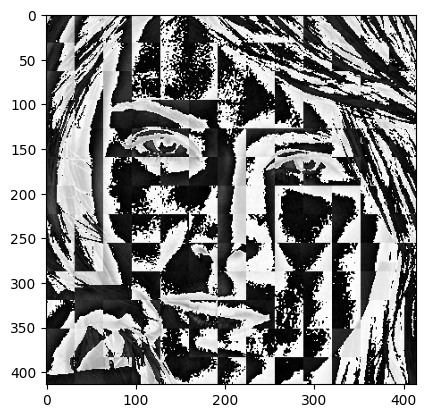

In [53]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [54]:
celebrity_file_name_ditionary

{'cropped': [],
 'lionel_messi': [],
 'maria_sharapova': ['./sports_person/cropped/maria_sharapova/maria_sharapova1.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova2.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova3.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova4.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova5.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova6.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova7.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova8.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova9.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova10.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova11.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova12.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova13.png',
  './sports_person/cropped/maria_sharapova/maria_sharapova14.png',
  './sports_per

In [55]:
class_dict = {}
count = 0
for celebrity in celebrity_file_name_dictionary.keys():
    class_dict[celebrity] = count
    count +=1
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [68]:
x = []
y = []
for celebrity_name,training_file in celebrity_file_name_dictionary.items():
    for training_image in training_file:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])


In [69]:
len(x)

163

In [70]:
len(y)

163

In [72]:
X = np.array(x).reshape(len(x),len(x[0])).astype(float)
X.shape

(163, 4096)

In [75]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [113]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=1)

pipe = Pipeline([('scaler', StandardScaler()),('svc',SVC(kernel= 'rbf', C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.8780487804878049

In [115]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.80      1.00      0.89         8
           3       0.86      0.75      0.80         8
           4       0.75      0.86      0.80         7
           5       1.00      0.90      0.95        10

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.87        41
weighted avg       0.89      0.88      0.88        41



In [141]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [178]:
model_params = {
    'svm' : {
        'model' : SVC(),
        'params' :{
            'svc__C' : [0.2,0.5,1,10,100,1000],
            'svc__kernel' : ['linear','rbf']
        }
    },
    'random_forest': {
        'model' : RandomForestClassifier(),
        'params' :{
            'randomforestclassifier__n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(),
        'params' : {
            'logisticregression__C' : [0.5,1,5,10]
        }
    }

}

In [179]:
scores = []
best_estimator = {}
import pandas as pd
for algo,mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score =False)
    clf.fit(x_train,y_train)
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_


df = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.835667,"{'svc__C': 0.2, 'svc__kernel': 'linear'}"
1,random_forest,0.654333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.827667,{'logisticregression__C': 1}


In [180]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=0.2, kernel='linear'))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(C=1))])}

In [181]:
best_estimators['svm'].score(x_test,y_test)

0.926829268292683

In [182]:
best_estimators['random_forest'].score(x_test,y_test)


0.7317073170731707

In [183]:
best_estimators['logistic_regression'].score(x_test,y_test)


0.9024390243902439

In [184]:
best_clf = best_estimators['svm']

In [185]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[7, 0, 0, 1, 0],
       [0, 8, 0, 0, 0],
       [0, 0, 7, 1, 0],
       [0, 0, 0, 7, 0],
       [0, 1, 0, 0, 9]], dtype=int64)

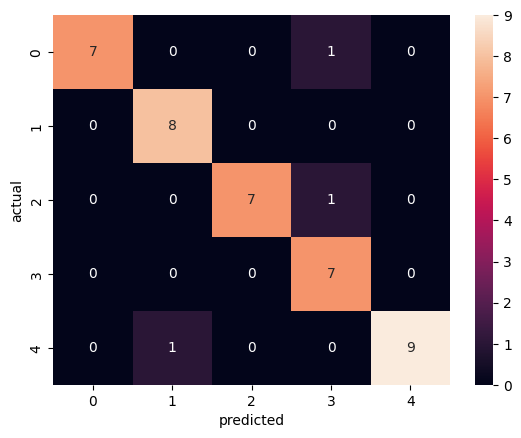

In [187]:
import seaborn as sn
plt.Figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [188]:
import joblib

In [189]:
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [191]:
import json
with open('class_dict.json',"w") as f:
    f.write(json.dumps(class_dict))